In [1]:

import pdb
import numpy as np
import matplotlib.pyplot as plt

from Bio import PDB

#matplotlib.use('TkAgg')
def read_ca_coordinates(filename):
    parser = PDB.PDBParser()
    structure = parser.get_structure("protein", filename)
    ca_coordinate = []
    res_idx = []

    for model in structure:
        for chain in model:
            for residue in chain:
                if 'CA' not in residue: #or len(residue['CA']) == 0:
                    continue
                ca_coordinate.append(residue['CA'].coord)
                res_idx.append(residue.get_id()[1])

    print(len(ca_coordinate))
    return res_idx,ca_coordinate

def GNM(filename):
    cuttoff = 7.5
    res_idx, ca_coordinate = read_ca_coordinates(filename)
    n2 = len(ca_coordinate)
    netmat = np.zeros((n2,n2),dtype=int)
    #print(netmat)
    for i in range(n2):
        for j in range(n2):
            if i==j:
                continue
            else:
                dis = ((ca_coordinate[i][0]-ca_coordinate[j][0]) ** 2 + (ca_coordinate[i][1]-ca_coordinate[j][1]) ** 2 +  (ca_coordinate[i][2]-ca_coordinate[j][2]) ** 2) ** 0.5
                if dis <= cuttoff:
                    netmat[i][j] = -1
                    netmat[j][i] = -1

    for i in range(n2):
        netmat[i][i] = -1 * np.sum(netmat[i])
    #print(netmat)
    evalues, evectors = np.linalg.eig(netmat)
    #print(np.sort(evalues))
    ###sort the evalues and the corresponding evectors
    idx = evalues.argsort()#[::-1]
    evalues = evalues[idx]
    evectors = evectors[:,idx]
    print(evalues)
    return res_idx, n2, evalues, evectors



In [2]:
res_idx, n2, evalues, evectors = GNM("9PAP.pdb")


212
[-1.70108271e-16  2.78818298e-01  5.95653341e-01  7.13580357e-01
  8.07400631e-01  8.92707319e-01  1.09162362e+00  1.25880121e+00
  1.30104806e+00  1.42757395e+00  1.73191478e+00  1.96023585e+00
  1.97450504e+00  2.01882333e+00  2.36012490e+00  2.40793246e+00
  2.59950980e+00  2.63011518e+00  2.90170764e+00  3.01442666e+00
  3.16887531e+00  3.37568850e+00  3.45007077e+00  3.68837196e+00
  3.78713036e+00  3.97015073e+00  3.99843387e+00  4.08538849e+00
  4.24412140e+00  4.39217404e+00  4.48563244e+00  4.64930504e+00
  4.73033847e+00  4.85398616e+00  4.88188397e+00  4.95744201e+00
  5.25927742e+00  5.28659380e+00  5.31457070e+00  5.41521903e+00
  5.65742228e+00  5.70162360e+00  5.82387400e+00  5.87228717e+00
  5.98003782e+00  6.00000000e+00  6.01949286e+00  6.21395891e+00
  6.30962606e+00  6.34090705e+00  6.43595396e+00  6.46327066e+00
  6.46897613e+00  6.53744807e+00  6.57003042e+00  6.71139354e+00
  6.75295361e+00  6.87417535e+00  6.98989720e+00  7.03145920e+00
  7.06058070e+00  7.1

In [7]:
from Gaussian_network_model import GNM
import numpy as np
import matplotlib.pyplot as plt
import sys

def normalized_cross_correlation(filename,mode_num):
    res_idx, n2, evalues, evectors = GNM(filename)
    cross_corr = np.zeros((n2,n2),dtype=float)
    norm_cross_corr = np.zeros((n2,n2),dtype=float)
    for i in range(n2):
        for j in range(n2):
            for k in range(mode_num):
                cross_corr[i][j] = cross_corr[i][j] + evectors[i][k+1] * evectors[j][k+1] / evalues[k+1]
    for i in range(n2):
        for j in range(n2):
            norm_cross_corr[i][j] = cross_corr[i][j] / np.sqrt(cross_corr[i][i] * cross_corr[j][j])
    res_num = 25
    norm_cross_corr_trueidx = np.zeros((res_idx[res_num-1]+1,res_idx[res_num-1]+1),dtype=float)
    for i in range(res_num):
        for j in range(res_num):
            norm_cross_corr_trueidx[res_idx[i]][res_idx[j]] = norm_cross_corr[i][j]
    plt.figure(num=1)
    plt.imshow(norm_cross_corr_trueidx.T, cmap='jet', origin='lower', interpolation=None)
    plt.colorbar()
    plt.show()

212
[-1.70108271e-16  2.78818298e-01  5.95653341e-01  7.13580357e-01
  8.07400631e-01  8.92707319e-01  1.09162362e+00  1.25880121e+00
  1.30104806e+00  1.42757395e+00  1.73191478e+00  1.96023585e+00
  1.97450504e+00  2.01882333e+00  2.36012490e+00  2.40793246e+00
  2.59950980e+00  2.63011518e+00  2.90170764e+00  3.01442666e+00
  3.16887531e+00  3.37568850e+00  3.45007077e+00  3.68837196e+00
  3.78713036e+00  3.97015073e+00  3.99843387e+00  4.08538849e+00
  4.24412140e+00  4.39217404e+00  4.48563244e+00  4.64930504e+00
  4.73033847e+00  4.85398616e+00  4.88188397e+00  4.95744201e+00
  5.25927742e+00  5.28659380e+00  5.31457070e+00  5.41521903e+00
  5.65742228e+00  5.70162360e+00  5.82387400e+00  5.87228717e+00
  5.98003782e+00  6.00000000e+00  6.01949286e+00  6.21395891e+00
  6.30962606e+00  6.34090705e+00  6.43595396e+00  6.46327066e+00
  6.46897613e+00  6.53744807e+00  6.57003042e+00  6.71139354e+00
  6.75295361e+00  6.87417535e+00  6.98989720e+00  7.03145920e+00
  7.06058070e+00  7.1

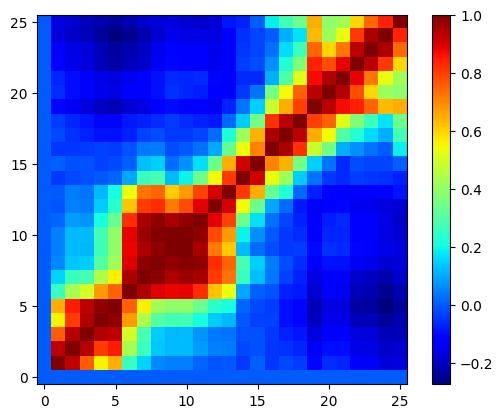

In [10]:
normalized_cross_correlation('9PAP.pdb',25)

In [11]:
import pdb
import numpy as np
import matplotlib.pyplot as plt

from Bio import PDB

#matplotlib.use('TkAgg')
def read_ca_coordinates(filename):
    parser = PDB.PDBParser()
    structure = parser.get_structure("protein", filename)
    ca_coordinate = []
    res_idx = []

    for model in structure:
        for chain in model:
            for residue in chain:
                if 'CA' not in residue: #or len(residue['CA']) == 0:
                    continue
                ca_coordinate.append(residue['CA'].coord)
                res_idx.append(residue.get_id()[1])

    print(len(ca_coordinate))
    return res_idx,ca_coordinate

def ANM(filename):
    cuttoff = 12.0
    res_idx, ca_coordinate = read_ca_coordinates(filename)
    postall = ca_coordinate
    #print(postall)
    n2 = len(ca_coordinate)
    hessian = np.zeros((3*n2,3*n2),dtype=float)
    #print(netmat)
    for i in range(n2):
        for j in range(n2):
            if i==j:
                continue
            else:
                dis = ((ca_coordinate[i][0]-ca_coordinate[j][0]) ** 2 + (ca_coordinate[i][1]-ca_coordinate[j][1]) ** 2 + (ca_coordinate[i][2]-ca_coordinate[j][2]) ** 2) ** 0.5
                if dis <= cuttoff:
                    hessian[3 * i][3 * j] = -(postall[j][0] - postall[i][0]) * (postall[j][0] - postall[i][0]) / (dis * dis)
                    hessian[3 * i][3 * j + 1] = -(postall[j][0] - postall[i][0]) * (postall[j][1] - postall[i][1]) / (dis * dis)
                    hessian[3 * i][3 * j + 2] = -(postall[j][0] - postall[i][0]) * (postall[j][2] - postall[i][2]) / (dis * dis)
                    hessian[3 * i + 1][3 * j] = -(postall[j][1] - postall[i][1]) * (postall[j][0] - postall[i][0]) / (dis * dis)
                    hessian[3 * i + 1][3 * j + 1] = -(postall[j][1] - postall[i][1]) * (postall[j][1] - postall[i][1]) / (dis * dis)
                    hessian[3 * i + 1][3 * j + 2] = -(postall[j][1] - postall[i][1]) * (postall[j][2] - postall[i][2]) / (dis * dis)
                    hessian[3 * i + 2][3 * j] = -(postall[j][2] - postall[i][2]) * (postall[j][0] - postall[i][0]) / (dis * dis)
                    hessian[3 * i + 2][3 * j + 1] = -(postall[j][2] - postall[i][2]) * (postall[j][1] - postall[i][1]) / (dis * dis)
                    hessian[3 * i + 2][3 * j + 2] = -(postall[j][2] - postall[i][2]) * (postall[j][2] - postall[i][2]) / (dis * dis)
                    #print(dis)
                    #print( hessian[3 * i + 2][3 * j + 2])
                    hessian[3 * j][3 * i] = hessian[3 * i][3 * j]
                    hessian[3 * j + 1][3 * i] = hessian[3 * i][3 * j + 1]
                    hessian[3 * j + 2][3 * i] = hessian[3 * i][3 * j + 2]
                    hessian[3 * j][3 * i + 1] = hessian[3 * i + 1][3 * j]
                    hessian[3 * j + 1][3 * i + 1] = hessian[3 * i + 1][3 * j + 1]
                    hessian[3 * j + 2][3 * i + 1] = hessian[3 * i + 1][3 * j + 2]
                    hessian[3 * j][3 * i + 2] = hessian[3 * i + 2][3 * j]
                    hessian[3 * j + 1][3 * i + 2] = hessian[3 * i + 2][3 * j + 1]
                    hessian[3 * j + 2][3 * i + 2] = hessian[3 * i + 2][3 * j +2]

    for i in range(n2):
        for j in range(n2):
            if j!=i:
                dis = ((ca_coordinate[i][0] - ca_coordinate[j][0]) ** 2 + (
                            ca_coordinate[i][1] - ca_coordinate[j][1]) ** 2 + (
                                   ca_coordinate[i][2] - ca_coordinate[j][2]) ** 2) ** 0.5
                if dis<=cuttoff:
                    hessian[3 * i][3 * i] = hessian[3 * i][3 * i] + (postall[j][0] - postall[i][0]) * (postall[j][0] - postall[i][0]) / (dis * dis)
                    hessian[3 * i][3 * i + 1] = hessian[3 * i][3 * i + 1] + (postall[j][0] - postall[i][0]) * (postall[j][1] - postall[i][1]) / (dis * dis)
                    hessian[3 * i][3 * i + 2] = hessian[3 * i][3 * i + 2] + (postall[j][0] - postall[i][0]) * (postall[j][2] - postall[i][2]) / (dis * dis)
                    hessian[3 * i + 1][3 * i] = hessian[3 * i + 1][3 * i] + (postall[j][1] - postall[i][1]) * (postall[j][0] - postall[i][0]) / (dis * dis)
                    hessian[3 * i + 1][3 * i + 1] = hessian[3 * i + 1][3 * i + 1] + (postall[j][1] - postall[i][1]) * (postall[j][1] - postall[i][1]) / (dis * dis)
                    hessian[3 * i + 1][3 * i + 2] = hessian[3 * i + 1][3 * i + 2] + (postall[j][1] - postall[i][1]) * (postall[j][2] - postall[i][2]) / (dis * dis)
                    hessian[3 * i + 2][3 * i] = hessian[3 * i + 2][3 * i] + (postall[j][2] - postall[i][2]) * (postall[j][0] - postall[i][0]) / (dis * dis)
                    hessian[3 * i + 2][3 * i + 1] = hessian[3 * i + 2][3 * i + 1] + (postall[j][2] - postall[i][2]) * (postall[j][1] - postall[i][1]) / (dis * dis)
                    hessian[3 * i + 2][3 * i + 2] = hessian[3 * i + 2][3 * i + 2] + (postall[j][2] - postall[i][2]) * (postall[j][2] - postall[i][2]) / (dis * dis)



    #print(hessian)
    evalues, evectors = np.linalg.eig(hessian)
    #print(np.sort(evalues))
    ###sort the evalues and the corresponding evectors
    idx = evalues.argsort()#[::-1]
    evalues = evalues[idx]
    evectors = evectors[:,idx]
    print(evalues[1:30])
    return res_idx, n2, postall, evalues, evectors



In [12]:
res_idx, n2, coords, evalues, evectors = ANM("9PAP.pdb")

212
[-1.11304230e-14 -8.27771568e-16  2.62611856e-15  2.20005172e-11
  4.98218808e-10  3.94461849e-01  4.42403899e-01  4.74179706e-01
  8.61797798e-01  9.22894009e-01  1.02745300e+00  1.05542766e+00
  1.08130565e+00  1.16330907e+00  1.22020116e+00  1.34281471e+00
  1.39517360e+00  1.40881327e+00  1.52808015e+00  1.58786859e+00
  1.68956325e+00  1.73255050e+00  1.79704915e+00  1.88180120e+00
  1.96961329e+00  1.98065743e+00  2.01159621e+00  2.14110293e+00
  2.19050902e+00]


In [13]:
from Anisotropic_network_model import ANM
import numpy as np
import matplotlib.pyplot as plt
import sys

def mode_display(filename,mode_idx):
    res_idx, n2, postall, evalues, evectors = ANM(filename)
    postall_add = np.zeros((n2,3),dtype=float)
    amplitude = 25.0
    fn = 'modedisp_' + str(mode_idx) + '.bild'
    file = open(fn, "w")
    for i in range(n2):
        postall_add[i][0] = postall[i][0] - (amplitude / evalues[mode_idx]) * evectors[3 * i][mode_idx]
        postall_add[i][1] = postall[i][1] - (amplitude / evalues[mode_idx])* evectors[3 * i + 1][mode_idx]
        postall_add[i][2] = postall[i][2] - (amplitude / evalues[mode_idx]) * evectors[3 * i + 2][mode_idx]

        content = '.arrow ' + str(postall[i][0]) + ' ' + str(postall[i][1]) + ' ' + str(postall[i][2]) + ' ' + str(postall_add[i][0]) + ' ' + str(postall_add[i][1]) + ' ' + str(postall_add[i][2]) + ' ' + ' 0.1 0.4 0.75' + '\n'
        file.write(content)
    file.close()


In [15]:
mode_display('9PAP.pdb',8)

212
[-1.11304230e-14 -8.27771568e-16  2.62611856e-15  2.20005172e-11
  4.98218808e-10  3.94461849e-01  4.42403899e-01  4.74179706e-01
  8.61797798e-01  9.22894009e-01  1.02745300e+00  1.05542766e+00
  1.08130565e+00  1.16330907e+00  1.22020116e+00  1.34281471e+00
  1.39517360e+00  1.40881327e+00  1.52808015e+00  1.58786859e+00
  1.68956325e+00  1.73255050e+00  1.79704915e+00  1.88180120e+00
  1.96961329e+00  1.98065743e+00  2.01159621e+00  2.14110293e+00
  2.19050902e+00]


In [16]:
from Gaussian_network_model import GNM
import numpy as np
import matplotlib.pyplot as plt
import sys

def fluctuation_dis(filename,mode_num):
    res_idx, n2, evalues, evectors = GNM(filename)
    flu = np.zeros((n2,1),dtype=float)
    for i in range(n2):
        for j in range(mode_num):
            flu[i] = flu[i] + evectors[i][j+1] * evectors[i][j+1] / evalues[j+1]
    plt.plot(res_idx[0:449],flu[0:449],color='k')
    plt.plot(res_idx[72:151], flu[72:151], color='b')
    plt.plot(res_idx[47:71], flu[47:71], color='r')
    plt.plot(res_idx[151:176], flu[151:176], color='r')
    #plt.legend()
    plt.show()



212
[-1.70108271e-16  2.78818298e-01  5.95653341e-01  7.13580357e-01
  8.07400631e-01  8.92707319e-01  1.09162362e+00  1.25880121e+00
  1.30104806e+00  1.42757395e+00  1.73191478e+00  1.96023585e+00
  1.97450504e+00  2.01882333e+00  2.36012490e+00  2.40793246e+00
  2.59950980e+00  2.63011518e+00  2.90170764e+00  3.01442666e+00
  3.16887531e+00  3.37568850e+00  3.45007077e+00  3.68837196e+00
  3.78713036e+00  3.97015073e+00  3.99843387e+00  4.08538849e+00
  4.24412140e+00  4.39217404e+00  4.48563244e+00  4.64930504e+00
  4.73033847e+00  4.85398616e+00  4.88188397e+00  4.95744201e+00
  5.25927742e+00  5.28659380e+00  5.31457070e+00  5.41521903e+00
  5.65742228e+00  5.70162360e+00  5.82387400e+00  5.87228717e+00
  5.98003782e+00  6.00000000e+00  6.01949286e+00  6.21395891e+00
  6.30962606e+00  6.34090705e+00  6.43595396e+00  6.46327066e+00
  6.46897613e+00  6.53744807e+00  6.57003042e+00  6.71139354e+00
  6.75295361e+00  6.87417535e+00  6.98989720e+00  7.03145920e+00
  7.06058070e+00  7.1

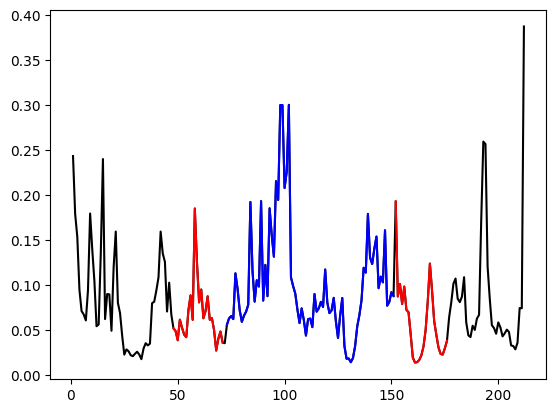

In [19]:
fluctuation_dis('9PAP.pdb',25)